In [290]:
%load_ext autoreload
%autoreload 2

from model import MLPModel, MLPConfig, EigModel
from utils import define_scheduler_lambda
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [205]:
scheduler_epochs = [4, 6, 10]
scheduler_lambda = define_scheduler_lambda(*scheduler_epochs, min_lambda = 0.03, steps_per = 2)

config = MLPConfig(d_model = 50, 
                   n_layer = 3,
                    weight_decay = 0.5,
                    latent_noise = 0.33, 
                    input_noise = 0.0,
                    normalization = 'rms',
                    epochs=sum(scheduler_epochs) + 10, 
                    scheduler_lambda=scheduler_lambda)
model = MLPModel(config).to('mps')

In [206]:
model.fit()

Evaluation | Accuracy: 8.69 %, Loss: 2.3349
Epoch [1/30], Step [100/600], loss: 2.2836
Epoch [1/30], Step [200/600], loss: 2.2085
Epoch [1/30], Step [300/600], loss: 2.1067
Epoch [1/30], Step [400/600], loss: 1.8875
Epoch [1/30], Step [500/600], loss: 1.6817
Epoch [1/30], Step [600/600], loss: 1.5633
learning rate = 3e-05
Evaluation | Accuracy: 67.69 %, Loss: 1.3283
Epoch [2/30], Step [100/600], loss: 1.2621
Epoch [2/30], Step [200/600], loss: 1.2241
Epoch [2/30], Step [300/600], loss: 1.0897
Epoch [2/30], Step [400/600], loss: 0.8404
Epoch [2/30], Step [500/600], loss: 0.7156
Epoch [2/30], Step [600/600], loss: 0.6244
learning rate = 0.00017320508075688773
Evaluation | Accuracy: 87.35 %, Loss: 0.6034
Epoch [3/30], Step [100/600], loss: 0.5725
Epoch [3/30], Step [200/600], loss: 0.4990
Epoch [3/30], Step [300/600], loss: 0.3945
Epoch [3/30], Step [400/600], loss: 0.2792
Epoch [3/30], Step [500/600], loss: 0.4515
Epoch [3/30], Step [600/600], loss: 0.2588
learning rate = 0.0001732050807

In [304]:
eigmodel = EigModel(model).to('mps')
eigmodel.set_eigenvector_model(threshold=1e-2)

Layer 2,   Nodes: 10
Layer 1,   Nodes: 332
Layer 0,   Nodes: 11170


In [305]:
eigmodel.validation()

Evaluation | Accuracy: 97.52 %, Loss: 2.3026


(97.52, 2.3025851249694824)

(array([5.171e+03, 4.989e+03, 4.973e+03, 5.047e+03, 5.009e+03, 4.998e+03,
        5.112e+03, 5.016e+03, 4.964e+03, 5.012e+03, 5.019e+03, 5.114e+03,
        4.972e+03, 5.064e+03, 5.063e+03, 5.062e+03, 5.233e+03, 5.188e+03,
        5.135e+03, 5.148e+03, 5.314e+03, 5.225e+03, 5.424e+03, 5.581e+03,
        5.514e+03, 5.581e+03, 5.859e+03, 6.001e+03, 6.022e+03, 6.123e+03,
        6.342e+03, 6.438e+03, 6.508e+03, 6.587e+03, 6.862e+03, 6.915e+03,
        7.159e+03, 7.246e+03, 7.328e+03, 7.559e+03, 7.726e+03, 7.680e+03,
        7.785e+03, 7.761e+03, 7.623e+03, 7.452e+03, 7.524e+03, 7.266e+03,
        6.899e+03, 6.786e+03, 6.541e+03, 6.060e+03, 5.838e+03, 5.524e+03,
        5.394e+03, 5.094e+03, 4.804e+03, 4.548e+03, 4.142e+03, 3.796e+03,
        3.637e+03, 3.267e+03, 3.058e+03, 2.694e+03, 2.392e+03, 2.260e+03,
        1.969e+03, 1.792e+03, 1.577e+03, 1.415e+03, 1.304e+03, 1.135e+03,
        9.910e+02, 9.020e+02, 8.550e+02, 7.040e+02, 6.320e+02, 5.370e+02,
        5.100e+02, 4.130e+02, 3.820e+0

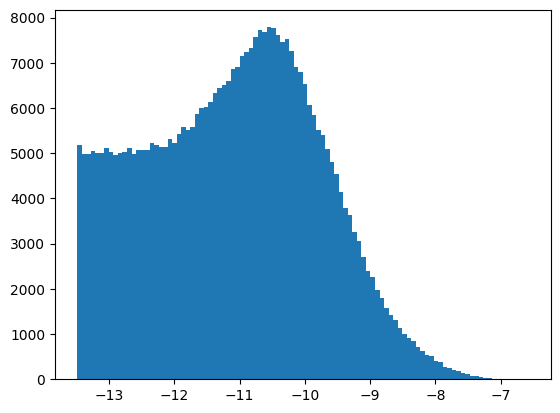

In [308]:
log_eigvals = torch.tensor([(node.log_eigval) for node in eigmodel.leaf_nodes])
plt.hist(log_eigvals.numpy(), bins=100)
# plt.yscale('log')

In [309]:
log_eigvals.argmax()

tensor(232485)

In [313]:
idx = log_eigvals.argmax()
node = eigmodel.leaf_nodes[idx]

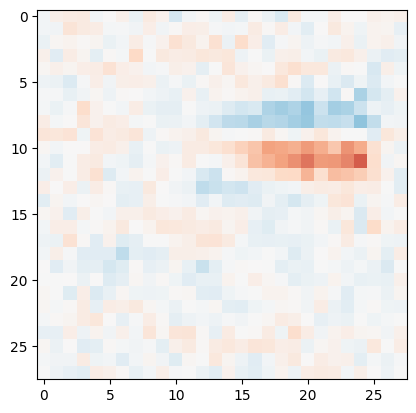

In [319]:
img = (node.eigenvector @ model.Embed.weight.cpu().detach())
plt.imshow(img.reshape(28,28), cmap='RdBu', vmin=-0.25, vmax = 0.25)

In [315]:
model.Embed.weight.shape

torch.Size([50, 784])

In [265]:
x = torch.randn(100, 50)
[child.forward(torch.randn(100, 50)).shape for child in parent.children]

tensor([ -7.0539,  -7.1598,  -7.2800,  -7.3466,  -7.5835,  -7.6906,  -7.8400,
         -7.9923,  -8.0453,  -8.2961,  -8.3815,  -8.4335,  -8.6623,  -9.0990,
         -9.4324,  -9.7783,  -9.8232, -10.2123, -10.3809, -10.6718, -11.1071,
        -10.9150, -10.7521, -10.3593, -10.1430,  -9.6899,  -9.5872,  -9.1459,
         -8.7996,  -8.6932,  -8.6458,  -8.4978,  -8.4062,  -8.1045,  -7.6205])

In [275]:
model.forward(torch.randn(100, 784).to('mps')).shape

torch.Size([100, 10])

In [171]:
model.layers[0].mlp.W.weight.shape

torch.Size([600, 300])

In [130]:
model

MLPModel(
  (Embed): Linear(in_features=784, out_features=300, bias=False)
  (layers): ModuleList(
    (0): Layer(
      (mlp): GatedMLP(
        (W): Linear(in_features=300, out_features=600, bias=False)
        (Proj): Linear(in_features=300, out_features=300, bias=False)
      )
      (norm): Norm(
        (norm): Identity()
        (noise): LatentNoise()
      )
    )
  )
  (Unembed): Linear(in_features=300, out_features=784, bias=False)
)